In [2]:
import sys
sys.path.append("../../src")
import auxiliary
import models
import constants
from maneuvers import Maneuvers
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import datetime
%load_ext autoreload
%autoreload 2

## Atmospheric Drag
<img src="atmDragExample.png" style="width:800px"/>

In [16]:
# CURTIS VER. 2013, PAGE 659
rp = 6593e3
ra = 7317e3
Omega = 340*np.pi/180
i = 65.1*np.pi/180
omega = 58*np.pi/180
nu = 332*np.pi/180
a = (rp+ra)/2
e = ra/a-1
coe = [a,e,i,omega,Omega,nu]
date = datetime.now()
satellite = models.CurtisSat()

maneuver = Maneuvers(coe,satellite,date,formulation="betts",verbose=True)
maneuver.terminalConditions["low_altitude"] = False
maneuver.terminalConditions["depleted_propellant"] = False
maneuver.addPerturbation("atmosphere")
maneuver.propagate(60*60*24*107.8,60,max_step=60);

Propagating...from day  0.0  to  107.8
Day: 107.001	Altitude: 235.008 km	Mass: 0.000
The solver successfully reached the end of the integration interval. (Status Code: 0)
100.0%



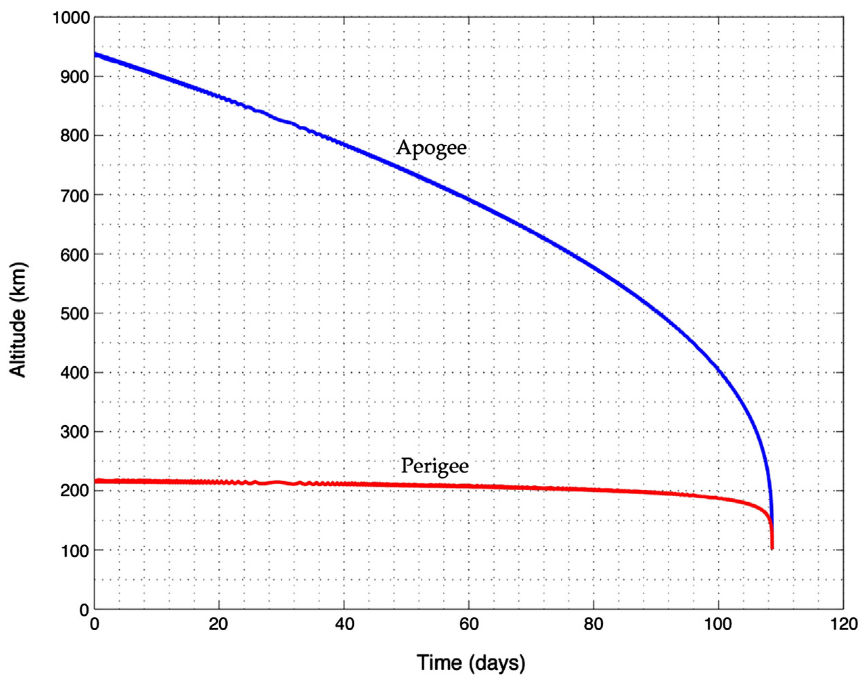

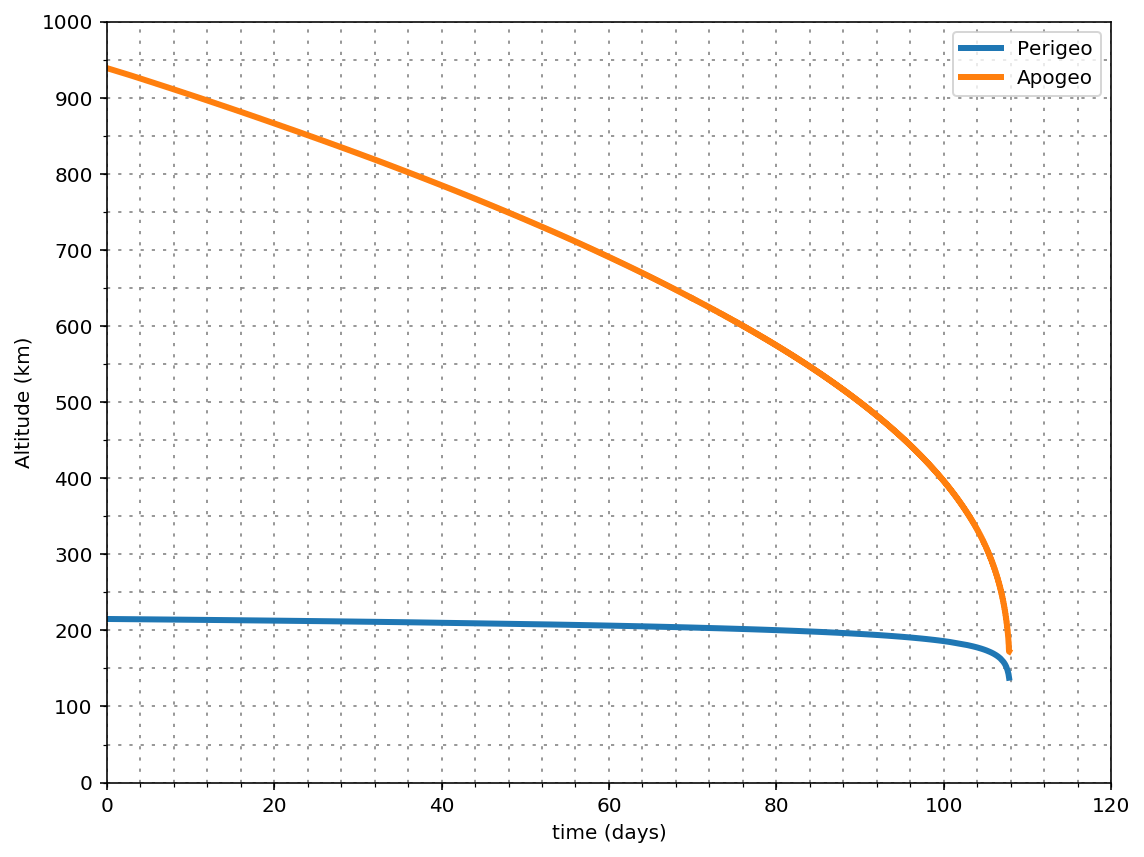

In [17]:
#%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
display(Image(filename='atmDrag.png',width="600px")) 
fig, ax = plt.subplots(figsize=(9,7))
ax.plot(maneuver.history.t/60/60/24,(maneuver.history.coe[:,0]*(1-maneuver.history.coe[:,1])-constants.Re)/1000,linewidth=3, label="Perigeo")
ax.plot(maneuver.history.t/60/60/24,(maneuver.history.coe[:,0]*(1+maneuver.history.coe[:,1])-constants.Re)/1000,linewidth=3, label="Apogeo")
ax.set_ylabel("Altitude (km)")
ax.set_xlabel("time (days)")
ax.set_ylim([0,1000])
ax.set_xlim([0,120])
ax.set_xticks(np.arange(0,121,20), minor=False)
ax.set_xticks(np.arange(0,121,4), minor=True)
ax.set_yticks(np.arange(0,1001,100), minor=False)
ax.set_yticks(np.arange(0,1001,50), minor=True)
ax.grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))
plt.legend()

## J2
<img src="J2Example.png" style="width:800px"/>

In [18]:
# CURTIS VER. 2013, PAGE 665
rp = 6678e3
ra = 9940e3
Omega = 45*np.pi/180
i = 28*np.pi/180
omega = 30*np.pi/180
nu = 40*np.pi/180
a = (rp+ra)/2
e = ra/a-1
coe = [a,e,i,omega,Omega,nu]
satellite = models.CurtisSat()

maneuver2 = Maneuvers(coe,satellite,date,formulation="betts")
maneuver2.terminalConditions["low_altitude"] = False
maneuver2.terminalConditions["depleted_propellant"] = False
maneuver2.addPerturbation("J2")
maneuver2.propagate(60*60*50,60,max_step=60);

Propagating...from day  0.0  to  2.0833333333333335
The solver successfully reached the end of the integration interval. (Status Code: 0)



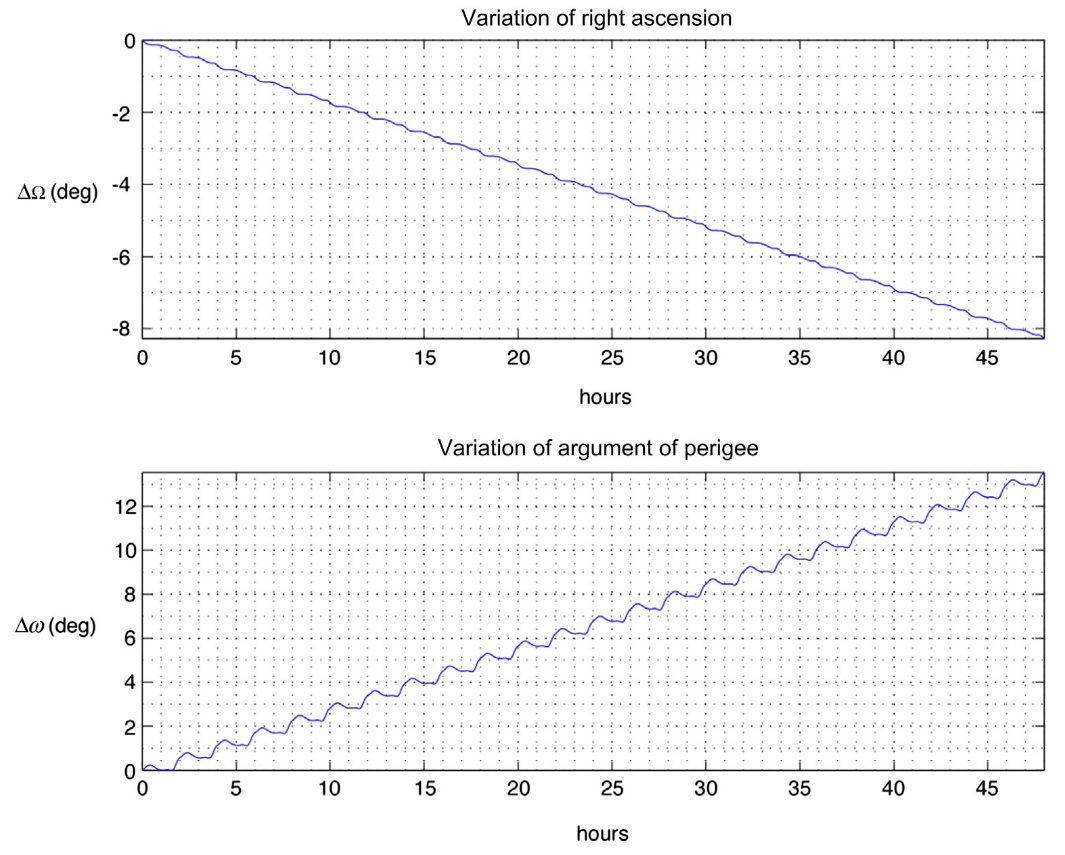

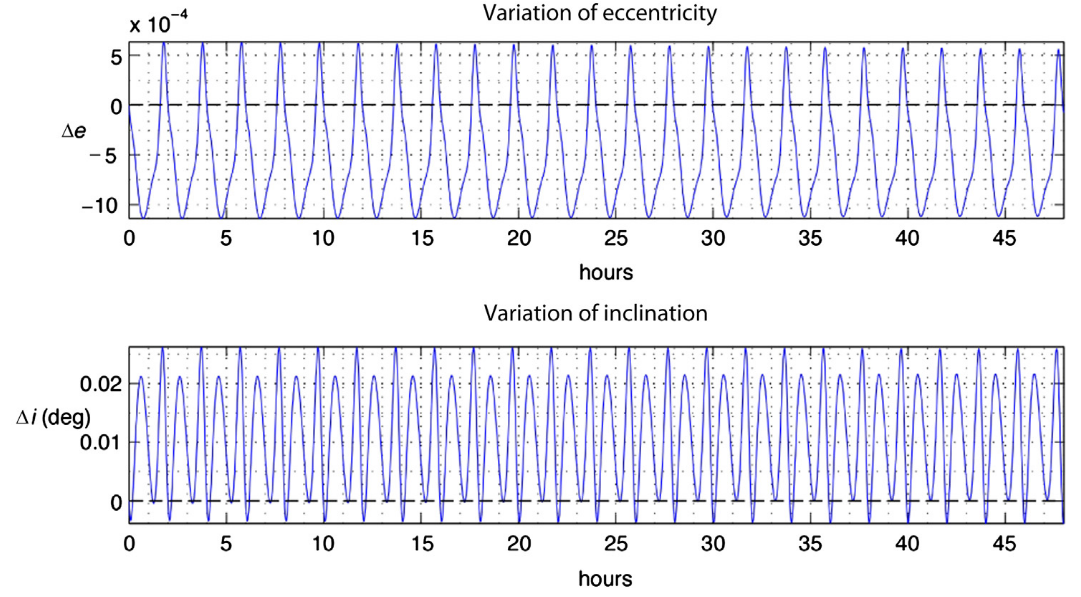

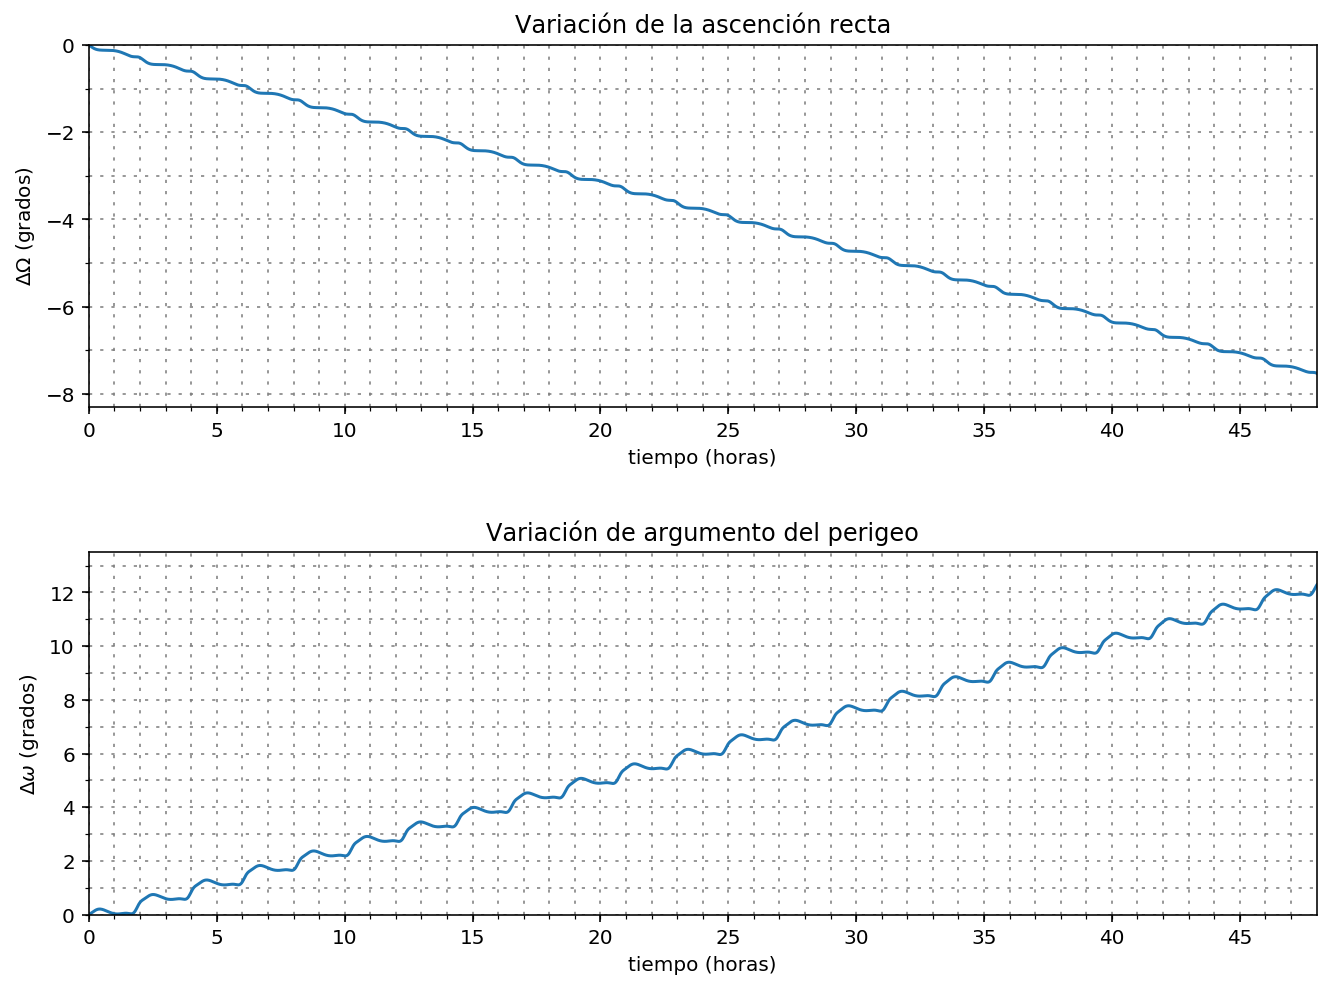

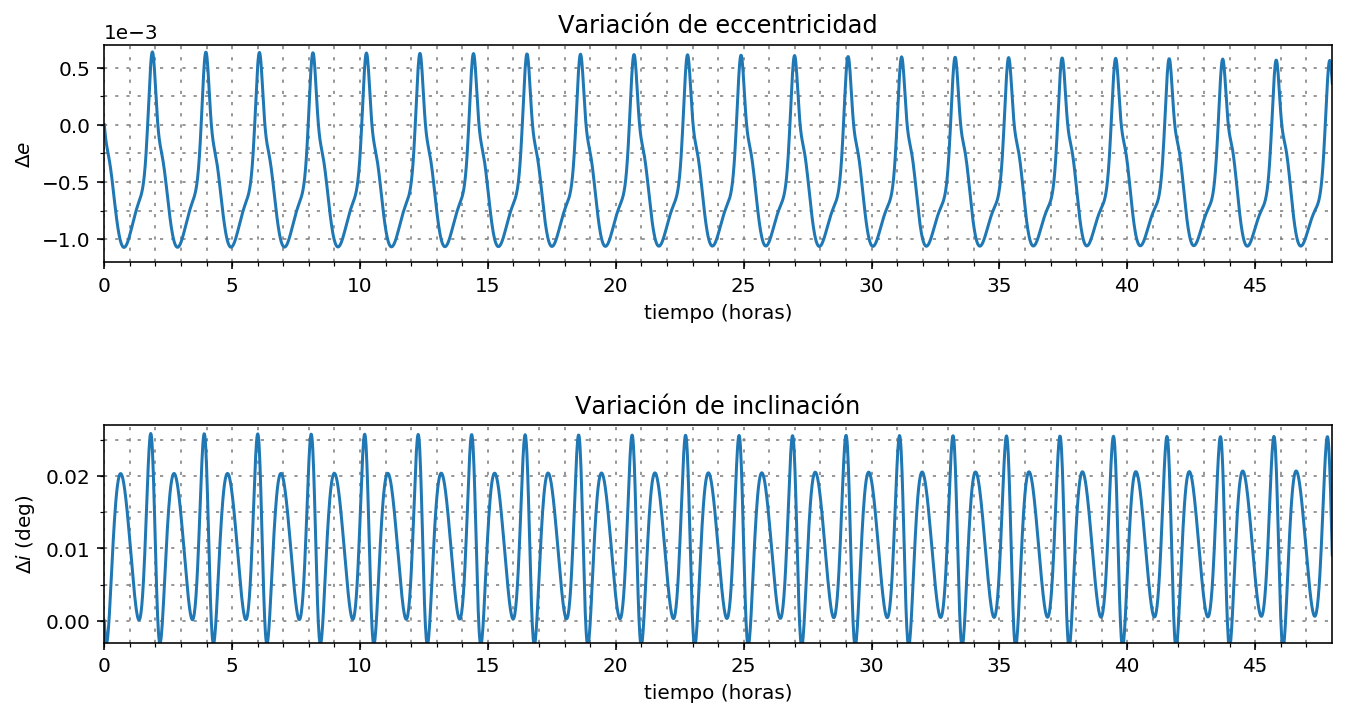

In [19]:
display(Image(filename='J2.png',width="600px")) 
display(Image(filename='J2_2.png',width="600px")) 
fig,(ax1,ax2) = plt.subplots(nrows=2, ncols=1,figsize=(11,8))
plt.subplots_adjust(hspace=0.4)
ax1.plot(maneuver2.history.t/60/60, (maneuver2.history.coe[:,4]-maneuver2.history.coe[0,4])*180/np.pi)
ax1.set_ylabel("$\Delta\Omega$ (grados)")
ax1.set_xlabel("tiempo (horas)")
ax1.set_title("Variación de la ascención recta")
ax1.set_xlim([0,48])
ax1.set_ylim([-8.3,0])
ax1.set_yticks(np.arange(-8,1,2), minor=False)
ax1.set_yticks(np.arange(-8,1,1), minor=True)
ax1.set_xticks(np.arange(0,48,5), minor=False)
ax1.set_xticks(np.arange(0,48,1), minor=True)
ax1.grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))

ax2.plot(maneuver2.history.t/60/60, (maneuver2.history.coe[:,3]-maneuver2.history.coe[0,3])*180/np.pi)
ax2.set_ylabel("$\Delta\omega$ (grados)")
ax2.set_xlabel("tiempo (horas)")
ax2.set_title("Variación de argumento del perigeo")
ax2.set_xlim([0,48])
ax2.set_xticks(np.arange(0,48,5), minor=False)
ax2.set_xticks(np.arange(0,48,1), minor=True)
ax2.set_ylim([0,13.5])
ax2.set_yticks(np.arange(0,14,2), minor=False)
ax2.set_yticks(np.arange(0,14,1), minor=True)
ax2.grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))


fig,(ax1,ax2) = plt.subplots(nrows=2, ncols=1,figsize=(11,5.5))
plt.subplots_adjust(hspace=0.75)
ax1.plot(maneuver2.history.t/60/60, (maneuver2.history.coe[:,1]-maneuver2.history.coe[0,1]))
ax1.set_ylabel("$\Delta e$")
ax1.set_xlabel("tiempo (horas)")
ax1.set_title("Variación de eccentricidad")
ax1.set_xlim([0,48])
ax1.set_xticks(np.arange(0,48,5), minor=False)
ax1.set_xticks(np.arange(0,48,1), minor=True)
ax1.set_ylim([-12e-4,7e-4])
ax1.set_yticks(np.arange(-10e-4,7e-4,5e-4), minor=False)
ax1.set_yticks(np.arange(-10e-4,7e-4,2.5e-4), minor=True)
ax1.grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

ax2.plot(maneuver2.history.t/60/60, (maneuver2.history.coe[:,2]-maneuver2.history.coe[0,2])*180/np.pi)
ax2.set_ylabel("$\Delta i$ (deg)")
ax2.set_xlabel("tiempo (horas)")
ax2.set_title("Variación de inclinación")
ax2.set_xlim([0,48])
ax2.set_xticks(np.arange(0,48,5), minor=False)
ax2.set_xticks(np.arange(0,48,1), minor=True)
ax2.set_ylim([-0.003,0.027])
ax2.set_yticks(np.arange(0,0.03,0.01), minor=False)
ax2.set_yticks(np.arange(0,0.03,0.005), minor=True)
ax2.grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))

## Solar Radiation Pressure
<img src="radPressureExample.png" style="width:800px"/>

In [20]:
# CURTIS VER. 2013, PAGE 703
h = 63383.4e6
e = 0.025422
a = h**2/(constants.mu_E*(1-e**2))
Omega = 45.3812*np.pi/180
i = 88.3924*np.pi/180
omega = 227.493*np.pi/180
nu = 343.427*np.pi/180

coe = [a,e,i,omega,Omega,nu]
satellite = models.CurtisSat()
satellite.area = 2*satellite.dryMass
date = datetime(year=1964,month=1,day=6)

maneuver3 = Maneuvers(coe,satellite,date,formulation="betts",verbose=True)
maneuver3.terminalConditions["low_altitude"] = False
maneuver3.terminalConditions["depleted_propellant"] = False
maneuver3.addPerturbation("solar_pressure")
maneuver3.propagate(60*60*24*1100,60,max_step=60);

Propagating...from day  0.0  to  1100.0
Day: 1100.000	Altitude: 3466.141 km	Mass: 0.000
The solver successfully reached the end of the integration interval. (Status Code: 0)
100.0%



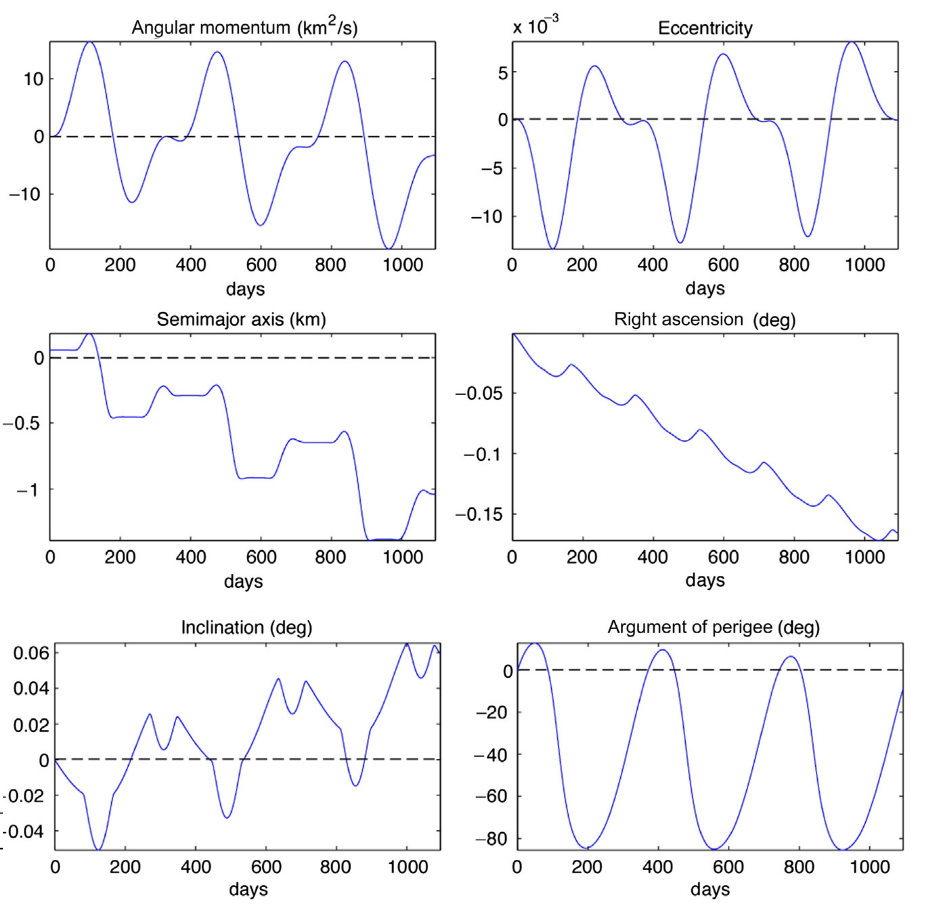

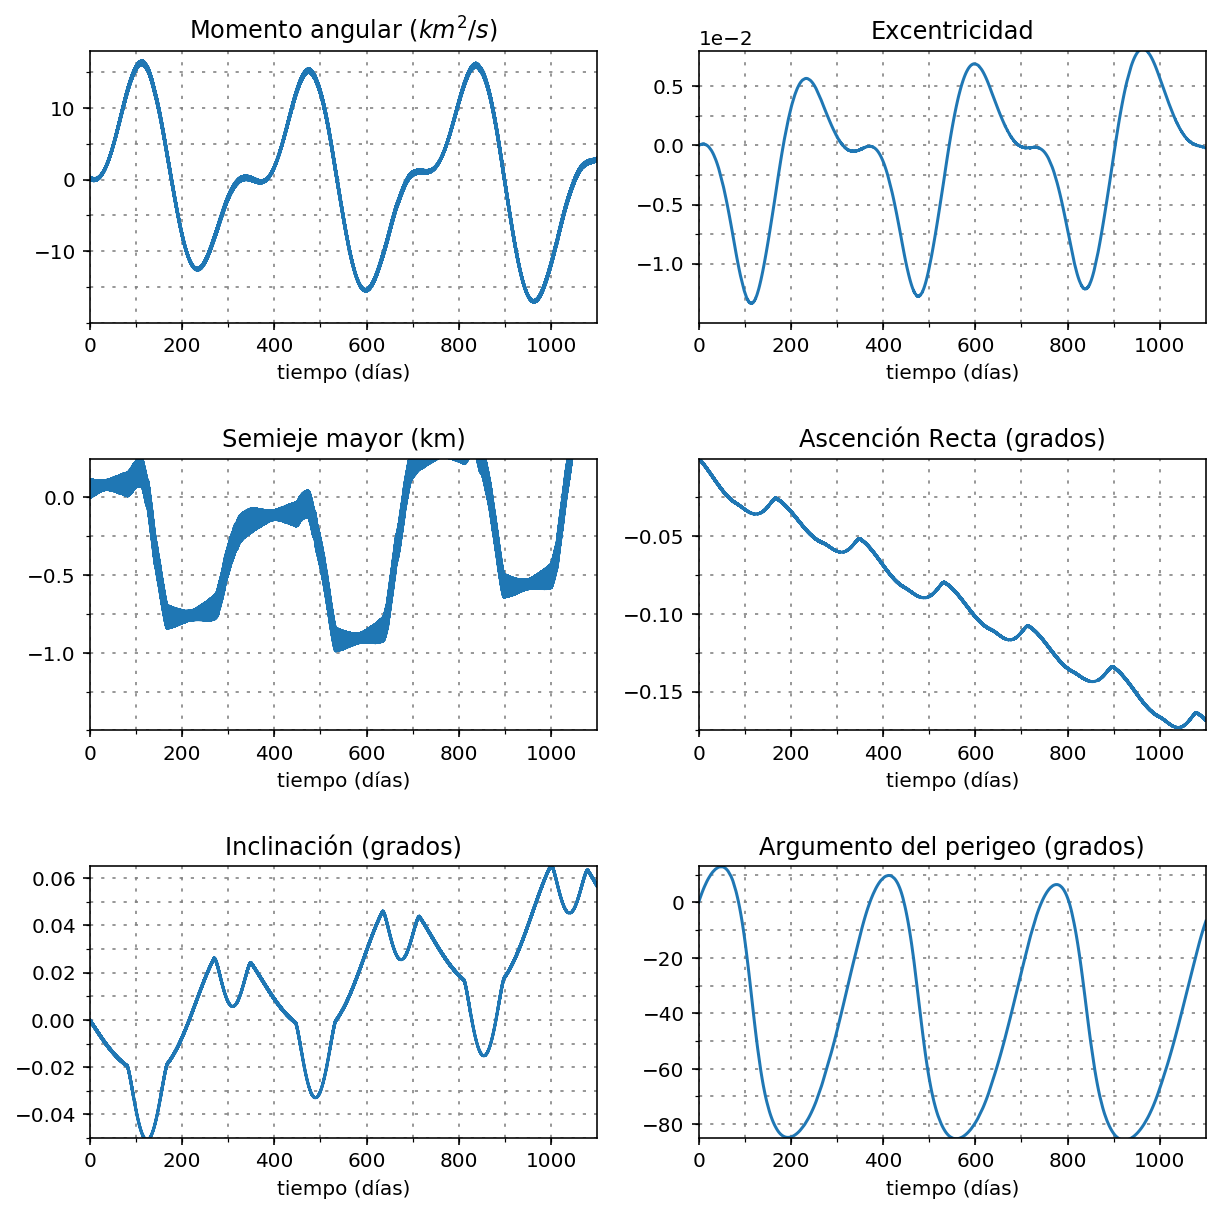

In [21]:
display(Image(filename='radPressure.png',width="600px"))
fig,axes = plt.subplots(nrows=3, ncols=2,figsize=(10,10))
h = np.sqrt(maneuver3.history.coe[:,0]*constants.mu_E*(1-maneuver3.history.coe[:,1]**2))
h0 = np.sqrt(maneuver3.history.coe[0,0]*constants.mu_E*(1-maneuver3.history.coe[0,1]**2))

axes[0,0].plot(maneuver3.history.t/60/60/24, (h-h0)/1e6)
axes[0,0].set_xlabel("tiempo (días)")
axes[0,0].set_title("Momento angular ($km^2/s$)")
axes[0,0].set_xlim([0,1100])
axes[0,0].set_xticks(np.arange(0,1100,200), minor=False)
axes[0,0].set_xticks(np.arange(0,1100,100), minor=True)
axes[0,0].set_ylim([-20,18])
axes[0,0].set_yticks(np.arange(-10,11,10), minor=False)
axes[0,0].set_yticks(np.arange(-20,18,5), minor=True)
axes[0,0].grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))

axes[0,1].plot(maneuver3.history.t/60/60/24, maneuver3.history.coe[:,1]-maneuver3.history.coe[0,1])
axes[0,1].set_title("Excentricidad")
axes[0,1].set_xlabel("tiempo (días)")
axes[0,1].set_xlim([0,1100])
axes[0,1].set_xticks(np.arange(0,1100,200), minor=False)
axes[0,1].set_xticks(np.arange(0,1100,100), minor=True)
axes[0,1].set_ylim([-15e-3,8e-3])
axes[0,1].set_yticks(np.arange(-10e-3,6e-3,5e-3), minor=False)
axes[0,1].set_yticks(np.arange(-10e-3,6e-3,2.5e-3), minor=True)
axes[0,1].grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))
axes[0,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

axes[1,0].plot(maneuver3.history.t/60/60/24, (maneuver3.history.coe[:,0]-maneuver3.history.coe[0,0])/1000)
axes[1,0].set_title("Semieje mayor (km)")
axes[1,0].set_xlabel("tiempo (días)")
axes[1,0].set_xlim([0,1100])
axes[1,0].set_xticks(np.arange(0,1100,200), minor=False)
axes[1,0].set_xticks(np.arange(0,1100,100), minor=True)
axes[1,0].set_ylim([-1.5,0.25])
axes[1,0].set_yticks(np.arange(-1,0.25,0.5), minor=False)
axes[1,0].set_yticks(np.arange(-1.5,0.25,0.25), minor=True)
axes[1,0].grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))
axes[1,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

axes[1,1].plot(maneuver3.history.t/60/60/24, (maneuver3.history.coe[:,4]-maneuver3.history.coe[0,4])*180/np.pi)
axes[1,1].set_title("Ascención Recta (grados)")
axes[1,1].set_xlabel("tiempo (días)")
axes[1,1].set_xlim([0,1100])
axes[1,1].set_xticks(np.arange(0,1100,200), minor=False)
axes[1,1].set_xticks(np.arange(0,1100,100), minor=True)
axes[1,1].set_ylim([-0.175,0])
axes[1,1].set_yticks(np.arange(-0.15,0,0.05), minor=False)
axes[1,1].set_yticks(np.arange(-0.175,0,0.025), minor=True)
axes[1,1].grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))

axes[2,0].plot(maneuver3.history.t/60/60/24, (maneuver3.history.coe[:,2]-maneuver3.history.coe[0,2])*180/np.pi)
axes[2,0].set_title("Inclinación (grados)")
axes[2,0].set_xlabel("tiempo (días)")
axes[2,0].set_xlim([0,1100])
axes[2,0].set_xticks(np.arange(0,1100,200), minor=False)
axes[2,0].set_xticks(np.arange(0,1100,100), minor=True)
axes[2,0].set_ylim([-0.05,0.065])
axes[2,0].set_yticks(np.arange(-0.04,0.065,0.02), minor=False)
axes[2,0].set_yticks(np.arange(-0.05,0.065,0.01), minor=True)
axes[2,0].grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))

axes[2,1].plot(maneuver3.history.t/60/60/24, (maneuver3.history.coe[:,3]-maneuver3.history.coe[0,3])*180/np.pi)
axes[2,1].set_title("Argumento del perigeo (grados)")
axes[2,1].set_xlabel("tiempo (días)")
axes[2,1].set_xlim([0,1100])
axes[2,1].set_xticks(np.arange(0,1100,200), minor=False)
axes[2,1].set_xticks(np.arange(0,1100,100), minor=True)
axes[2,1].set_ylim([-85,13])
axes[2,1].set_yticks(np.arange(-80,13,20), minor=False)
axes[2,1].set_yticks(np.arange(-80,13,10), minor=True)
axes[2,1].grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))
plt.subplots_adjust(hspace=0.5)

## Lunar Gravity
<img src="lunarGravityExample.png" style="width:800px"/>

In [22]:
# CURTIS VER. 2013, PAGE 710
h_LEO = 51591.1e6
e_LEO = 0.01
a_LEO = h_LEO**2/(constants.mu_E*(1-e_LEO**2))
a_LEO = 6678.136e3
Omega_LEO = 0*np.pi/180
i_LEO = 28.5*np.pi/180
omega_LEO = 0*np.pi/180
nu_LEO = 0*np.pi/180
T_LEO = 2*np.pi*(a_LEO**3/constants.mu_E)**0.5

h_HEO = 69084.1e6
e_HEO = 0.741
a_HEO = h_HEO**2/(constants.mu_E*(1-e_HEO**2))
a_HEO = 26553.4e3
Omega_HEO = 0*np.pi/180
i_HEO = 63.4*np.pi/180
omega_HEO = 270*np.pi/180
nu_HEO = 0*np.pi/180
T_HEO = 2*np.pi*(a_HEO**3/constants.mu_E)**0.5

h_GEO = 129640e6
e_GEO = 0.0001
a_GEO = h_GEO**2/(constants.mu_E*(1-e_GEO**2))
a_GEO = 42164e3
Omega_GEO = 0*np.pi/180
i_GEO = 1*np.pi/180
omega_GEO = 0*np.pi/180
nu_GEO = 0*np.pi/180
T_GEO = 2*np.pi*(a_GEO**3/constants.mu_E)**0.5

coeLEO = [a_LEO,e_LEO,i_LEO,omega_LEO,Omega_LEO,nu_LEO]
coeHEO = [a_HEO,e_HEO,i_HEO,omega_HEO,Omega_HEO,nu_HEO]
coeGEO = [a_GEO,e_GEO,i_GEO,omega_GEO,Omega_GEO,nu_GEO]

satellite = models.CurtisSat()
satellite.dryMass = satellite.wetMass-0.1
date = datetime(year=2007,month=7,day=1,hour=12)

In [23]:
maneuver4LEO = Maneuvers(coeLEO,satellite,date,verbose=True)
maneuver4LEO.terminalConditions["low_altitude"] = False
maneuver4LEO.terminalConditions["depleted_propellant"] = False

maneuver4LEO.addPerturbation("moon_gravity")
maneuver4LEO.propagate(60*60*24*60,60,max_step=10);

maneuver4HEO = Maneuvers(coeHEO,satellite,date,verbose=True)
maneuver4HEO.terminalConditions["low_altitude"] = False
maneuver4HEO.terminalConditions["depleted_propellant"] = False
maneuver4HEO.addPerturbation("moon_gravity")
maneuver4HEO.propagate(60*60*24*60,60*60,max_step=10);

maneuver4GEO = Maneuvers(coeGEO,satellite,date,verbose=True)
maneuver4GEO.terminalConditions["low_altitude"] = False
maneuver4GEO.terminalConditions["depleted_propellant"] = False
maneuver4GEO.addPerturbation("moon_gravity")
maneuver4GEO.propagate(60*60*24*60,60*60,max_step=T_GEO/10);
print("-Done-")

Propagating...from day  0.0  to  60.0
Day: 60.000	Altitude: 233.449 km	Mass: 0.100
The solver successfully reached the end of the integration interval. (Status Code: 0)
100.0%

Propagating...from day  0.0  to  60.0
Day: 60.000	Altitude: 35761.722 km	Mass: 0.100
The solver successfully reached the end of the integration interval. (Status Code: 0)
100.0%

Propagating...from day  0.0  to  60.0
Day: 60.000	Altitude: 35784.624 km	Mass: 0.100
The solver successfully reached the end of the integration interval. (Status Code: 0)
100.0%

-Done-


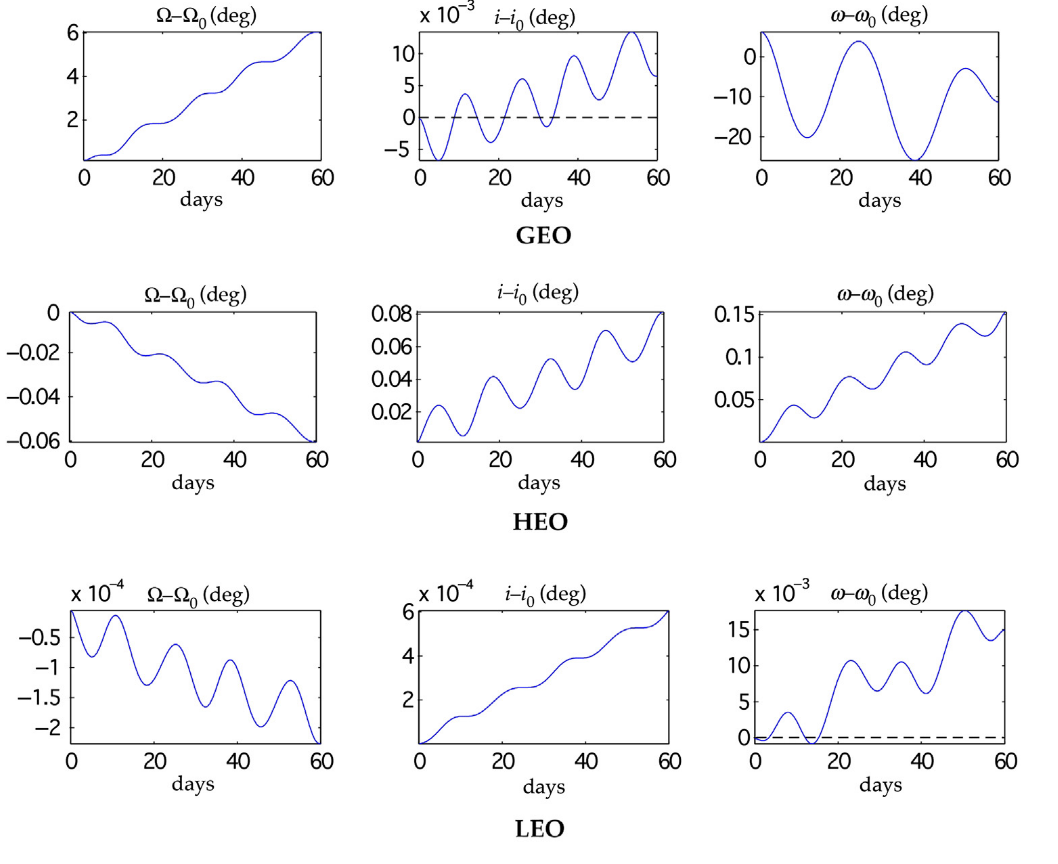

Text(0.5, 0.04, 'LEO')

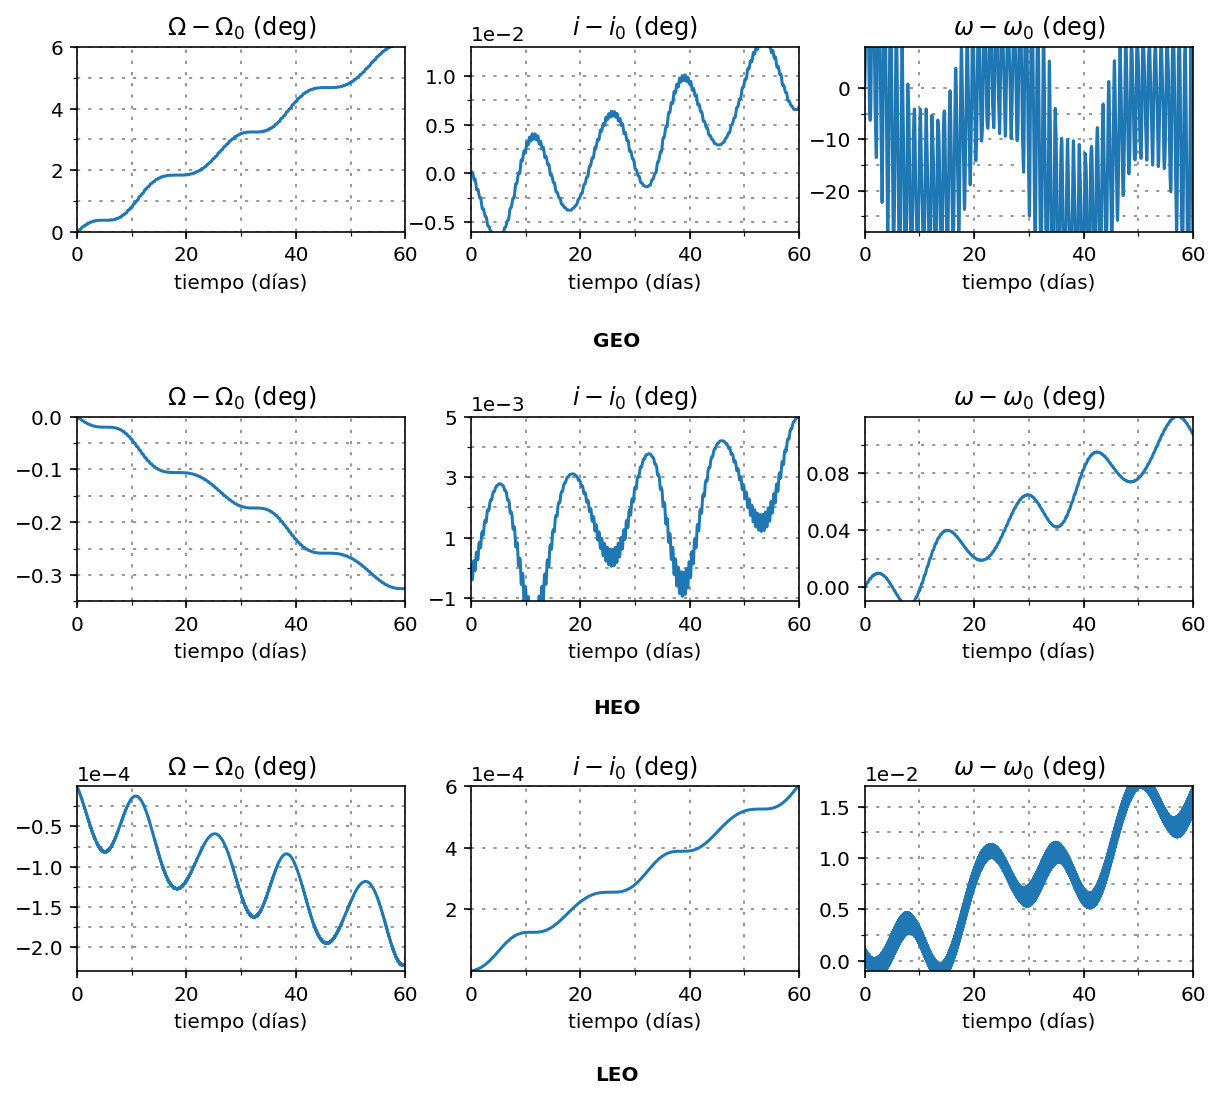

In [24]:
display(Image(filename='lunarGravity.png',width="600px"))
%config InlineBackend.figure_format = 'retina'
fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(10,8.5))
axes[0,0].plot(maneuver4GEO.history.t/60/60/24, (((maneuver4GEO.history.coe[:,4]-maneuver4GEO.history.coe[0,4])*180/np.pi)+180)%360-180)
axes[0,0].set_title("$\Omega-\Omega_0$ (deg)")
axes[0,0].set_xlabel("tiempo (días)")
axes[0,0].set_xlim([0,60])
axes[0,0].set_xticks(np.arange(0,61,20), minor=False)
axes[0,0].set_xticks(np.arange(0,61,10), minor=True)
axes[0,0].set_ylim([0,6])
axes[0,0].set_yticks(np.arange(0,7,2), minor=False)
axes[0,0].set_yticks(np.arange(0,7,1), minor=True)
axes[0,0].grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))

axes[0,1].plot(maneuver4GEO.history.t/60/60/24, (maneuver4GEO.history.coe[:,2]-maneuver4GEO.history.coe[0,2])*180/np.pi)
axes[0,1].set_title("$i-i_0$ (deg)")
axes[0,1].set_xlabel("tiempo (días)")
axes[0,1].set_xlim([0,60])
axes[0,1].set_xticks(np.arange(0,61,20), minor=False)
axes[0,1].set_xticks(np.arange(0,61,10), minor=True)
axes[0,1].set_ylim([-6e-3,13e-3])
axes[0,1].set_yticks(np.arange(-5e-3,11e-3,5e-3), minor=False)
axes[0,1].set_yticks(np.arange(-5e-3,11e-3,2.5e-3), minor=True)
axes[0,1].grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))
axes[0,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

axes[0,2].plot(maneuver4GEO.history.t/60/60/24, (((maneuver4GEO.history.coe[:,3]-maneuver4GEO.history.coe[0,3])*180/np.pi)+180)%360-180)
axes[0,2].set_title("$\omega-\omega_0$ (deg)")
axes[0,2].set_xlabel("tiempo (días)")
axes[0,2].set_xlim([0,60])
axes[0,2].set_xticks(np.arange(0,61,20), minor=False)
axes[0,2].set_xticks(np.arange(0,61,10), minor=True)
axes[0,2].set_ylim([-28,8])
axes[0,2].set_yticks(np.arange(-20,1,10), minor=False)
axes[0,2].set_yticks(np.arange(-25,5,5), minor=True)
axes[0,2].grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))

axes[1,0].plot(maneuver4HEO.history.t/60/60/24, (((maneuver4HEO.history.coe[:,4]-maneuver4HEO.history.coe[0,4])*180/np.pi)+180)%360-180)
axes[1,0].set_title("$\Omega-\Omega_0$ (deg)")
axes[1,0].set_xlabel("tiempo (días)")
axes[1,0].set_xlim([0,60])
axes[1,0].set_xticks(np.arange(0,61,20), minor=False)
axes[1,0].set_xticks(np.arange(0,61,10), minor=True)
axes[1,0].set_ylim([-0.35,0])
axes[1,0].set_yticks(np.arange(-0.30,0.05,0.1), minor=False)
axes[1,0].set_yticks(np.arange(-0.35,0.05,0.05), minor=True)
axes[1,0].grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))

axes[1,1].plot(maneuver4HEO.history.t/60/60/24, (maneuver4HEO.history.coe[:,2]-maneuver4HEO.history.coe[0,2])*180/np.pi)
axes[1,1].set_title("$i-i_0$ (deg)")
axes[1,1].set_xlabel("tiempo (días)")
axes[1,1].set_xlim([0,60])
axes[1,1].set_xticks(np.arange(0,61,20), minor=False)
axes[1,1].set_xticks(np.arange(0,61,10), minor=True)
axes[1,1].set_ylim([-1.1e-3,5e-3])
axes[1,1].set_yticks(np.arange(-1e-3,6e-3,2e-3), minor=False)
axes[1,1].set_yticks(np.arange(-1e-3,6e-3,1e-3), minor=True)
axes[1,1].grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))
axes[1,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

axes[1,2].plot(maneuver4HEO.history.t/60/60/24, (((maneuver4HEO.history.coe[:,3]-maneuver4HEO.history.coe[0,3])*180/np.pi)+180)%360-180)
axes[1,2].set_title("$\omega-\omega_0$ (deg)")
axes[1,2].set_xlabel("tiempo (días)")
axes[1,2].set_xlim([0,60])
axes[1,2].set_xticks(np.arange(0,61,20), minor=False)
axes[1,2].set_xticks(np.arange(0,61,10), minor=True)
axes[1,2].set_ylim([-0.01,0.12])
axes[1,2].set_yticks(np.arange(0,0.12,0.04), minor=False)
axes[1,2].set_yticks(np.arange(0,0.12,0.02), minor=True)
axes[1,2].grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))

axes[2,0].plot(maneuver4LEO.history.t/60/60/24, (((maneuver4LEO.history.coe[:,4]-maneuver4LEO.history.coe[0,4])*180/np.pi)+180)%360-180)
axes[2,0].set_title("$\Omega-\Omega_0$ (deg)")
axes[2,0].set_xlabel("tiempo (días)")
axes[2,0].set_xlim([0,60])
axes[2,0].set_xticks(np.arange(0,61,20), minor=False)
axes[2,0].set_xticks(np.arange(0,61,10), minor=True)
axes[2,0].set_ylim([-2.3e-4,0])
axes[2,0].set_yticks(np.arange(-2e-4,0,0.5e-4), minor=False)
axes[2,0].set_yticks(np.arange(-2e-4,0,0.25e-4), minor=True)
axes[2,0].grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))
axes[2,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

axes[2,1].plot(maneuver4LEO.history.t/60/60/24, (maneuver4LEO.history.coe[:,2]-maneuver4LEO.history.coe[0,2])*180/np.pi)
axes[2,1].set_title("$i-i_0$ (deg)")
axes[2,1].set_xlabel("tiempo (días)")
axes[2,1].set_xlim([0,60])
axes[2,1].set_xticks(np.arange(0,61,20), minor=False)
axes[2,1].set_xticks(np.arange(0,61,10), minor=True)
axes[2,1].set_ylim([0,6e-4])
axes[2,1].set_yticks(np.arange(2e-4,7e-4,2e-4), minor=False)
axes[2,1].set_yticks(np.arange(2e-4,7e-4,2e-4), minor=True)
axes[2,1].grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))
axes[2,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

axes[2,2].plot(maneuver4LEO.history.t/60/60/24, (((maneuver4LEO.history.coe[:,3]-maneuver4LEO.history.coe[0,3])*180/np.pi)+180)%360-180)
axes[2,2].set_title("$\omega-\omega_0$ (deg)")
axes[2,2].set_xlabel("tiempo (días)")
axes[2,2].set_xlim([0,60])
axes[2,2].set_xticks(np.arange(0,61,20), minor=False)
axes[2,2].set_xticks(np.arange(0,61,10), minor=True)
axes[2,2].set_ylim([-1e-3,17e-3])
axes[2,2].set_yticks(np.arange(0,16e-3,5e-3), minor=False)
axes[2,2].set_yticks(np.arange(0,16e-3,2.5e-3), minor=True)
axes[2,2].grid(b=True, which='minor', color='gray', linestyle=':',dashes=(2, 5))
axes[2,2].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.subplots_adjust(wspace=0.2,hspace=1)
plt.figtext(0.5, 0.64, 'GEO', ha='center', va='center',weight="bold")
plt.figtext(0.5, 0.34, 'HEO', ha='center', va='center',weight="bold")
plt.figtext(0.5, 0.04, 'LEO', ha='center', va='center',weight="bold")

 ## Solar Gravity

In [27]:
maneuver5LEO = Maneuvers(coeLEO,satellite,date,verbose=True)
maneuver5LEO.terminalConditions["low_altitude"] = False
maneuver5LEO.terminalConditions["depleted_propellant"] = False
maneuver5LEO.addPerturbation("sun_gravity")
maneuver5LEO.propagate(60*60*24*720,60*60,max_step=60);

maneuver5GEO = Maneuvers(coeGEO,satellite,date,verbose=True)
maneuver5GEO.terminalConditions["low_altitude"] = False
maneuver5GEO.terminalConditions["depleted_propellant"] = False
maneuver5GEO.addPerturbation("sun_gravity")
maneuver5GEO.propagate(60*60*24*720,60*60,max_step=60);
print("-Done-")

Propagating...from day  0.0  to  720.0
Day: 720.000	Altitude: 257.086 km	Mass: 0.100
The solver successfully reached the end of the integration interval. (Status Code: 0)
100.0%

Propagating...from day  0.0  to  720.0
Day: 720.000	Altitude: 35790.507 km	Mass: 0.100
The solver successfully reached the end of the integration interval. (Status Code: 0)
100.0%

-Done-


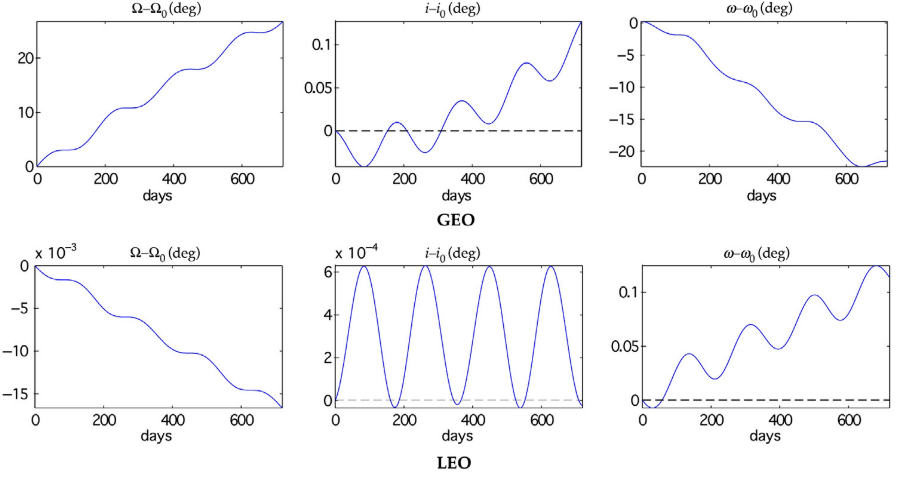

Text(0.5, 0, 'LEO')

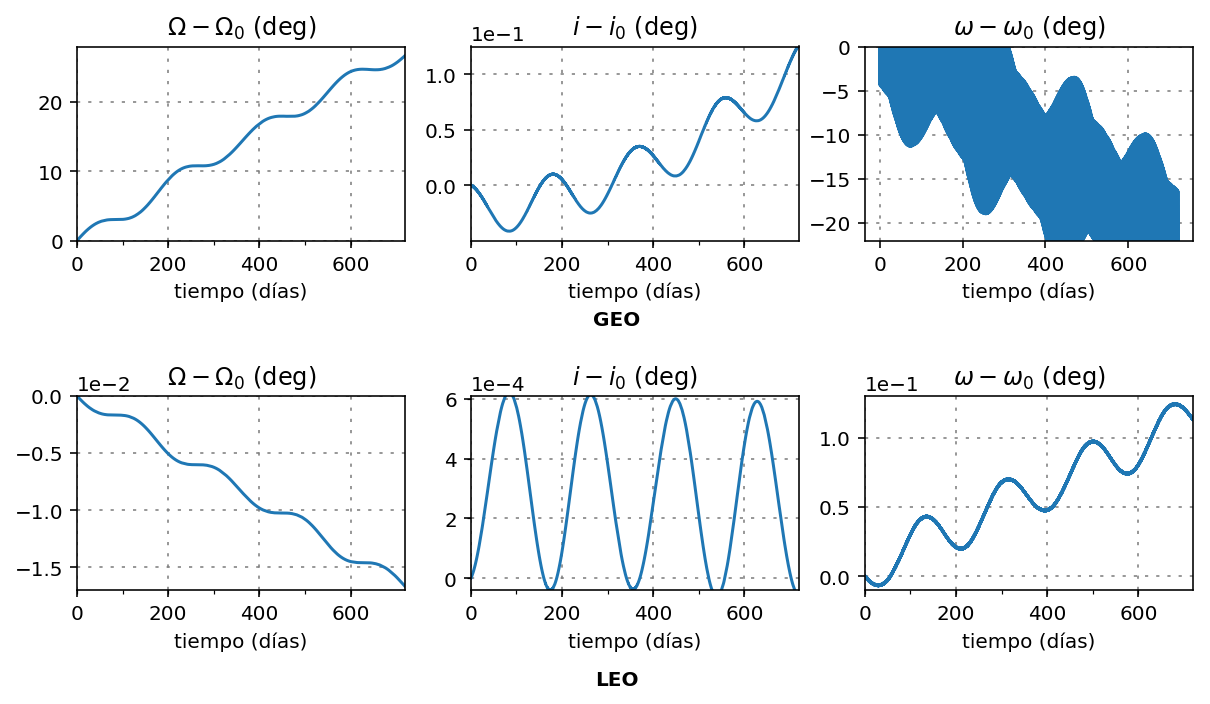

In [33]:
display(Image(filename='solarGravity.png',width="600px"))

fig,axes = plt.subplots(nrows=2, ncols=3,figsize=(10,5))
axes[0,0].plot(maneuver5GEO.history.t/60/60/24, (((maneuver5GEO.history.coe[:,4]-maneuver5GEO.history.coe[0,4])*180/np.pi)+180)%360-180)
axes[0,0].set_title("$\Omega-\Omega_0$ (deg)")
axes[0,0].set_xlabel("tiempo (días)")
axes[0,0].set_xlim([0,720])
axes[0,0].set_xticks(np.arange(0,601,200), minor=False)
axes[0,0].set_xticks(np.arange(0,601,100), minor=True)
axes[0,0].set_ylim([0,28])
axes[0,0].set_yticks(np.arange(0,26,10), minor=False)
#axes[0,0].set_yticks(np.arange(0,26,5), minor=True)
axes[0,0].grid(b=True, which='major', color='gray', linestyle=':',dashes=(2, 5))

axes[0,1].plot(maneuver5GEO.history.t/60/60/24, (maneuver5GEO.history.coe[:,2]-maneuver5GEO.history.coe[0,2])*180/np.pi)
axes[0,1].set_title("$i-i_0$ (deg)")
axes[0,1].set_xlabel("tiempo (días)")
axes[0,1].set_xlim([0,720])
axes[0,1].set_xticks(np.arange(0,601,200), minor=False)
axes[0,1].set_xticks(np.arange(0,601,100), minor=True)
axes[0,1].set_ylim([-0.05,0.125])
axes[0,1].set_yticks(np.arange(0,0.15,0.05), minor=False)
#axes[0,1].set_yticks(np.arange(0,0.2,0.05), minor=True)
axes[0,1].grid(b=True, which='major', color='gray', linestyle=':',dashes=(2, 5))
axes[0,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

axes[0,2].plot(maneuver5GEO.history.t/60/60/24, (((maneuver5GEO.history.coe[:,3]-maneuver5GEO.history.coe[0,3])*180/np.pi)+180)%360-180)
axes[0,2].set_title("$\omega-\omega_0$ (deg)")
axes[0,2].set_xlabel("tiempo (días)")
axes[0,1].set_xlim([0,720])
axes[0,1].set_xticks(np.arange(0,601,200), minor=False)
axes[0,1].set_xticks(np.arange(0,601,100), minor=True)
axes[0,2].set_ylim([-22,0])
axes[0,2].set_yticks(np.arange(-20,1,5), minor=False)
#axes[0,2].set_yticks(np.arange(-25,5,5), minor=True)
axes[0,2].grid(b=True, which='major', color='gray', linestyle=':',dashes=(2, 5))

axes[1,0].plot(maneuver5LEO.history.t/60/60/24, (((maneuver5LEO.history.coe[:,4]-maneuver5LEO.history.coe[0,4])*180/np.pi)+180)%360-180)
axes[1,0].set_title("$\Omega-\Omega_0$ (deg)")
axes[1,0].set_xlabel("tiempo (días)")
axes[1,0].set_xlim([0,720])
axes[1,0].set_xticks(np.arange(0,601,200), minor=False)
axes[1,0].set_xticks(np.arange(0,601,100), minor=True)
axes[1,0].set_ylim([-17e-3,0])
axes[1,0].set_yticks(np.arange(-15e-3,0.1e-3,5e-3), minor=False)
#axes[1,0].set_yticks(np.arange(-2e-4,0,0.25e-4), minor=True)
axes[1,0].grid(b=True, which='major', color='gray', linestyle=':',dashes=(2, 5))
axes[1,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

axes[1,1].plot(maneuver5LEO.history.t/60/60/24, (maneuver5LEO.history.coe[:,2]-maneuver5LEO.history.coe[0,2])*180/np.pi)
axes[1,1].set_title("$i-i_0$ (deg)")
axes[1,1].set_xlabel("tiempo (días)")
axes[1,1].set_xlim([0,720])
axes[1,1].set_xticks(np.arange(0,601,200), minor=False)
axes[1,1].set_xticks(np.arange(0,601,100), minor=True)
axes[1,1].set_ylim([-0.4e-4,6.1e-4])
axes[1,1].set_yticks(np.arange(0,7e-4,2e-4), minor=False)
axes[1,1].set_yticks(np.arange(0,7e-4,2e-4), minor=True)
axes[1,1].grid(b=True, which='major', color='gray', linestyle=':',dashes=(2, 5))
axes[1,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

axes[1,2].plot(maneuver5LEO.history.t/60/60/24, (((maneuver5LEO.history.coe[:,3]-maneuver5LEO.history.coe[0,3])*180/np.pi)+180)%360-180)
axes[1,2].set_title("$\omega-\omega_0$ (deg)")
axes[1,2].set_xlabel("tiempo (días)")
axes[1,2].set_xlim([0,720])
axes[1,2].set_xticks(np.arange(0,601,200), minor=False)
axes[1,2].set_xticks(np.arange(0,601,100), minor=True)
axes[1,2].set_ylim([-0.01,0.13])
axes[1,2].set_yticks(np.arange(0,0.11,0.05), minor=False)
#axes[1,2].set_yticks(np.arange(0,16e-3,2.5e-3), minor=True)
axes[1,2].grid(b=True, which='major', color='gray', linestyle=':',dashes=(2, 5))
axes[1,2].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.subplots_adjust(wspace=0.2,hspace=0.8)
plt.figtext(0.5, 0.5, 'GEO', ha='center', va='center',weight="bold")
plt.figtext(0.5, 0, 'LEO', ha='center', va='center',weight="bold")